## Sales Analysis Project

### Overview
The goal of this project is to answer 5 business questions leveraging data from a company's sales history

### Questions
1. What was the best month for sales? How much was earned that month?
2. What city sold the most product?
3. What time should we display advertisements to maximize the likelihood of customers buying product?
4. What products are most often sold together?
5. What product sold the most? Why do you think it sold the most?

### Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

### Merge datasets
We currently have the sales data split by months, contained in 12 csv files. It will be more effective to have all the data in one table.

In [7]:
#create new data frame to store all the data 
sales = pd.DataFrame()

#loop through all datasets and add them to the sales data frame
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for month in months:
    df = pd.read_csv(f"Sales_{month}_2019.csv")
    sales = pd.concat([sales, df])
    
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [8]:
#duplicate sales data frame to avoid having to rerun the previous code block
sales_df = sales.copy()
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Data cleaning and exploration

In [10]:
#check for null values
sales_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#### Note:
Looks like we have 545 empty rows in our sales data. I am going to confirm if this is the case or if we just happen to have 545 random missing values in each column.

In [12]:
#extract every row containing a null value
sales_null = sales_df[sales_df.isnull().sum(axis = 1) > 0]
sales_null

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaN,NaN
22962,NaN,NaN,NaN,NaN,NaN,NaN
23309,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


#### Note:
We have 545 rows containing null values. Therefore, all 545 rows are empty.

In [14]:
#drop null values
sales_df = sales_df.dropna()

In [15]:
sales_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [16]:
#convert quantity and price to numeric values to perform calculations for the analysis
#pd.to_numeric(sales_df['Quantity Ordered'])
#pd.to_numeric(sales_df['Price Each'])
#I ran into a ValueError while running this code block

#### Note:
"ValueError: Unable to parse string "Quantity Ordered" at position 1069"

This means there's at least one non-numeric value in the quantity column. I will rearrange the table by the quantity column to bring the strings to the top.

In [18]:
#check error
sales_df.sort_values(by = 'Quantity Ordered', ascending = False).head(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10338,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
9104,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
9289,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
15419,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
7727,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10443,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
7563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4138,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
7507,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [19]:
#drop rows with string values in quantity and price columns
sales_df = sales_df[pd.to_numeric(sales_df['Quantity Ordered'], errors = 'coerce').notna()]
sales_df = sales_df[pd.to_numeric(sales_df['Price Each'], errors = 'coerce').notna()]

In [20]:
#convert to numeric
sales_df['Quantity Ordered'] = pd.to_numeric(sales_df['Quantity Ordered'])
sales_df['Price Each'] = pd.to_numeric(sales_df['Price Each'])

In [21]:
#confirm change
sales_df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### Question 1
What was the best month for sales? How much was earned that month?

#### Note:
I'll be looking at "best month for sale" in two ways: 
1. The month with the highest revenue
2. The month with the most products sold

In [23]:
#convert order date to datetime to extract month
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])

/tmp/ipykernel_450/2716553914.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])


In [24]:
sales_df['Month'] = sales_df['Order Date'].dt.strftime("%b")

In [25]:
sales_df['Month Number'] = sales_df['Order Date'].dt.month
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Number
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Jan,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Jan,1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Jan,1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Jan,1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Jan,1


In [26]:
#Create revenue column
sales_df['Revenue'] = sales_df['Quantity Ordered'] * sales_df['Price Each']
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Number,Revenue
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Jan,1,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Jan,1,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Jan,1,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Jan,1,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Jan,1,11.99


In [27]:
#group months and sum revenue and quantity columns
sales_q1 = sales_df.groupby('Month').agg({'Quantity Ordered': 'sum', 'Revenue': 'sum', 'Month Number': 'mean'}).sort_values(by = 'Month Number')
sales_q1.head()

,Quantity Ordered,Revenue,Month Number
Month,,,
Jan,10903,1822256.73,1.0
Feb,13449,2202022.42,2.0
Mar,17005,2807100.38,3.0
Apr,20558,3390670.24,4.0
May,18667,3152606.75,5.0


In [28]:
sales_q1 = sales_q1.reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

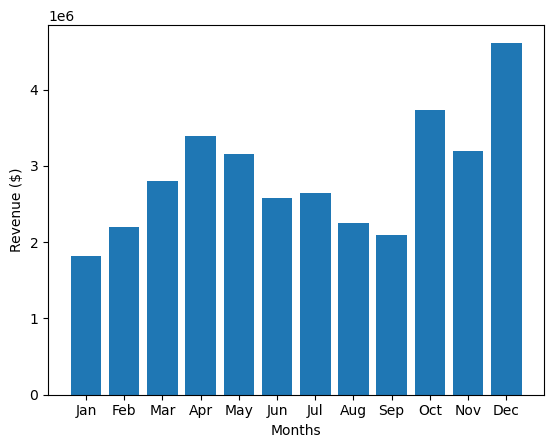

In [29]:
plt.bar(sales_q1['Month'], sales_q1['Revenue'])
plt.xlabel('Months')
plt.ylabel('Revenue ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

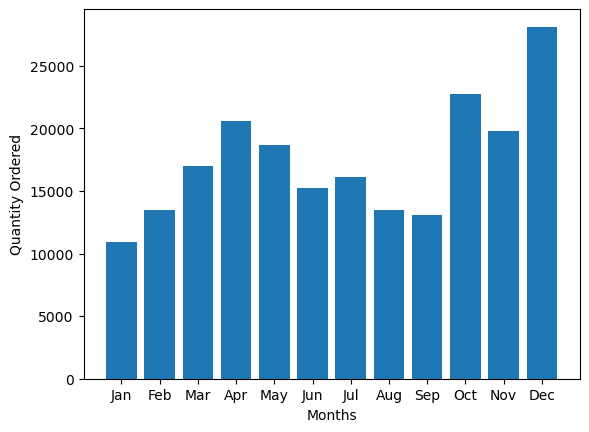

In [30]:
plt.bar(sales_q1['Month'], sales_q1['Quantity Ordered'])
plt.xlabel('Months')
plt.ylabel('Quantity Ordered')
plt.show

In [31]:
sales_q1.sort_values(by = 'Revenue', ascending = False).head(1)

,Month,Quantity Ordered,Revenue,Month Number
11,Dec,28114,4613443.34,12.0


### Answer 1
December has both the highest revenue and the most products sold. Hence, we can conclude that December was the best month for sales.

$4,613,443.34 in revenue was generated in December.

It is interesting to note that both graphs are identical. This most likely means the distribution of sales among product types are similar every month.

### Question 2
What city sold the most product?

In [34]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Number,Revenue
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Jan,1,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Jan,1,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Jan,1,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Jan,1,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Jan,1,11.99


In [35]:
#split address by "," and extract city and state
sales_df['City'] = sales_df['Purchase Address'].apply(lambda x: x.split(',')[1])
sales_df['State'] = sales_df['Purchase Address'].apply(lambda x: x.split(',')[2])

#remove zip code
sales_df['State'] = sales_df['State'].apply(lambda x: x.split(' ')[1])

In [36]:
#concatenate city and state
sales_df['City'] = sales_df['City'] + ', ' + sales_df['State']

#drop state column
sales_df = sales_df.drop(columns = 'State')

In [37]:
sales_q2 = sales_df.groupby('City').agg({'Quantity Ordered': 'sum'}).sort_values(by = 'Quantity Ordered', ascending = False)
sales_q2 = sales_q2.reset_index()

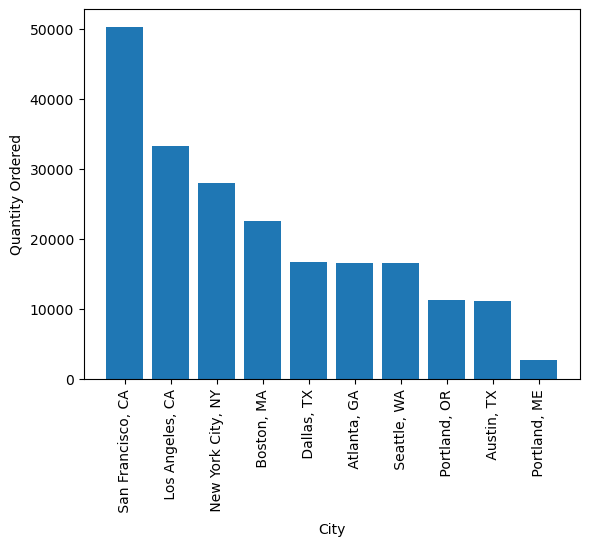

In [38]:
plt.bar(sales_q2['City'], sales_q2['Quantity Ordered'])
plt.xlabel('City')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation = 'vertical')
plt.show()

### Answer 2
San Francisco sold the most products. 

### Question 3
What time should we display advertisements to maximize the likelihood of customers buying product?

In [41]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Number,Revenue,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Jan,1,700.00,"Boston, MA"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Jan,1,14.95,"Portland, OR"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Jan,1,23.98,"San Francisco, CA"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Jan,1,149.99,"Los Angeles, CA"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Jan,1,11.99,"Austin, TX"


In [42]:
#extract hour from order date
sales_df["Hour"] = sales_df["Order Date"].dt.hour
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Number,Revenue,City,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Jan,1,700.00,"Boston, MA",21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Jan,1,14.95,"Portland, OR",14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Jan,1,23.98,"San Francisco, CA",13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Jan,1,149.99,"Los Angeles, CA",20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Jan,1,11.99,"Austin, TX",11


In [43]:
#group by hour
sales_q3 = sales_df.groupby("Hour")["Quantity Ordered"].sum().reset_index()
sales_q3.head()

,Hour,Quantity Ordered
0,0,4428
1,1,2619
2,2,1398
3,3,928
4,4,937


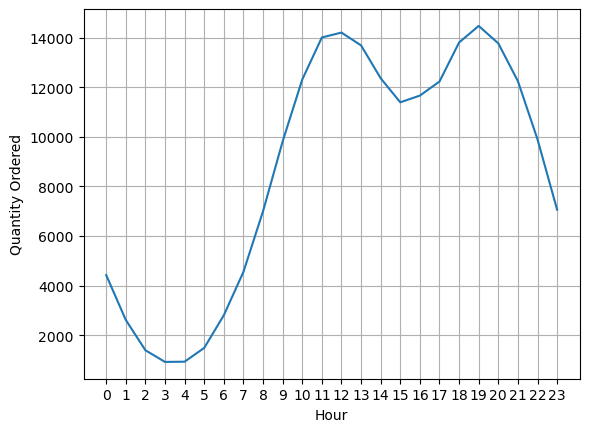

In [44]:
plt.plot(sales_q3["Hour"], sales_q3["Quantity Ordered"])
plt.xlabel("Hour")
plt.ylabel("Quantity Ordered")
plt.xticks(sales_q3["Hour"])
plt.grid(True)
plt.show()

### Answer 3
Notice the peak times are around 12 pm and  7 pm. I would advice we display advertisements an hour to half an hour before the peak times to maximize the likelihood of customers buying product. Customers on average spend the most at these times so I assume they would be ready to make purchases if prompted by the right ad.

### Question 4
What products are most often sold together?

In [47]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Number,Revenue,City,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Jan,1,700.00,"Boston, MA",21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Jan,1,14.95,"Portland, OR",14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Jan,1,23.98,"San Francisco, CA",13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Jan,1,149.99,"Los Angeles, CA",20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Jan,1,11.99,"Austin, TX",11


In [48]:
#drop orders with only one product
sales_dups = sales_df[sales_df["Order ID"].duplicated(keep = False)]
sales_dups.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Number,Revenue,City,Hour
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Jan,1,11.95,"Austin, TX",16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Jan,1,11.99,"Austin, TX",16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Jan,1,150.00,"Los Angeles, CA",8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Jan,1,11.52,"Los Angeles, CA",8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",Jan,1,400.00,"New York City, NY",11


In [49]:
#group orders with the same order id
sales_q4 = sales_dups.groupby("Order ID")["Product"].apply(",".join).reset_index()
sales_q4.head()

,Order ID,Product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"


In [50]:
#create every combination of 2 products in every order and count the total appearance of each pair
#Reference: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

#import libraries
from itertools import combinations
from collections import Counter

In [51]:
apps = Counter()
for prod_combo in sales_q4["Product"]:
    products = prod_combo.split(",")
    apps.update(Counter(combinations(products, 2)))
    
apps.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [52]:
#convert apps counter to a pd data frame for further analysis
sales_apps = pd.DataFrame.from_dict(apps, orient = "index", columns = ["Appearances"])
sales_apps = sales_apps.sort_values(by = "Appearances", ascending = False).reset_index()
sales_apps = sales_apps.rename(columns = {"index" : "Combos"})
sales_apps.head(5)

,Combos,Appearances
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361


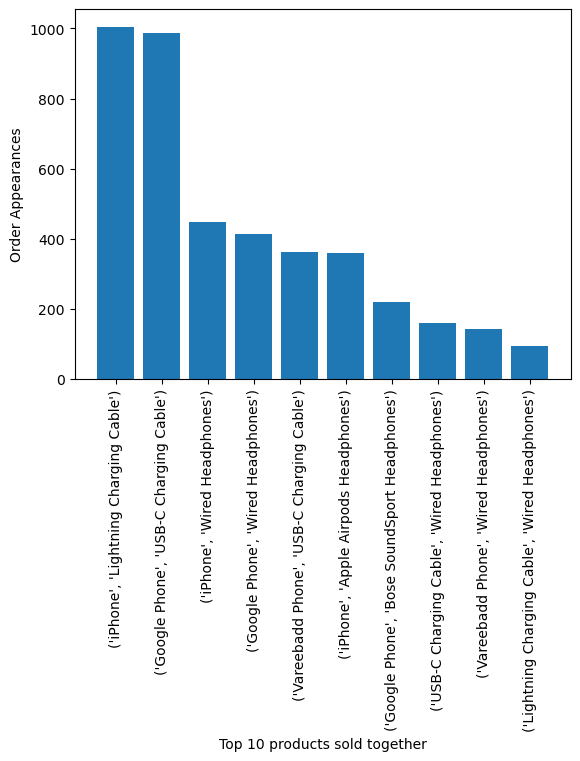

In [53]:
#filter top 10 for visualization
sales_apps_viz = sales_apps.astype({"Combos" : "str"}).head(10)

plt.bar(sales_apps_viz["Combos"], sales_apps_viz["Appearances"])
plt.xlabel("Top 10 products sold together")
plt.ylabel("Order Appearances")
plt.xticks(rotation = "vertical")
plt.show()

### Answer 4
Notice that the top 2 pairs of items sold together are a phone and its respective charger. This makes sense knowing that these phones do not come with a charger. I assume that customers are almost forced to buy the appropriate charger when purchasing a phone. 

The company could use this insight to offer a discount on chargers when customers purchase a phone. This could make the company more attractive when customers are deciding where to purchase a new phone.

### Question 5
What product sold the most? Why do you think it sold the most?

In [56]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Number,Revenue,City,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Jan,1,700.00,"Boston, MA",21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Jan,1,14.95,"Portland, OR",14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Jan,1,23.98,"San Francisco, CA",13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Jan,1,149.99,"Los Angeles, CA",20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Jan,1,11.99,"Austin, TX",11


In [57]:
sales_q5 = sales_df.groupby("Product").agg({"Quantity Ordered" : "sum", "Price Each" : "mean"}).reset_index()
sales_q5.sort_values(by = "Quantity Ordered", ascending = False).head()

,Product,Quantity Ordered,Price Each
5,AAA Batteries (4-pack),31017,2.99
4,AA Batteries (4-pack),27635,3.84
15,USB-C Charging Cable,23975,11.95
12,Lightning Charging Cable,23217,14.95
17,Wired Headphones,20557,11.99


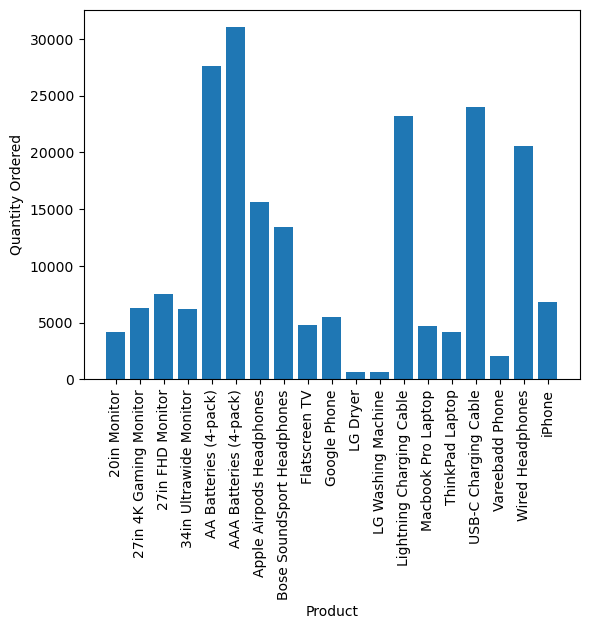

In [58]:
plt.bar(sales_q5["Product"], sales_q5["Quantity Ordered"])
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.xticks(rotation = "vertical")
plt.show()

### Answer 5
The most sold item is the "AAA Batteries (4-pack)." There could be a number of reasons for this but to keep things simple, the two main factors I assume contribute to this are: price and demand.

The data set has information on the price so I am going to further analyze it to see if there is any correlation.

Regarding demand, research suggests that the "AAA Batteries (4-pack)" typically last a few months before needing replacement when actively used. In addition, it is likely that customers have multiple devices that require AAA batteries. This could explain the high sales volume.

Furthermore, the lowest selling products are the LG Washing Machine and Dryer. These products can last more than a decade and only one of each is typically needed in a house or an apartment, hence the low sales volume.

#### Check for Correlation Between Price and Quantity

/tmp/ipykernel_450/1053208632.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sales_q5["Product"], rotation = "vertical")


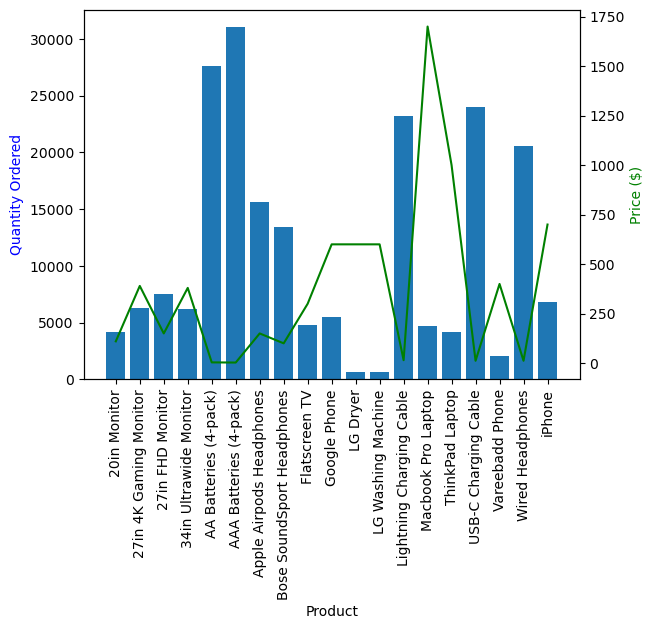

In [61]:
#plot price and quantity vs product
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(sales_q5["Product"], sales_q5["Quantity Ordered"])
ax1.set_ylabel("Quantity Ordered", color = "blue")

ax2.plot(sales_q5["Product"], sales_q5["Price Each"], color = "green")
ax2.set_ylabel("Price ($)", color = "green")

ax1.set_xlabel("Product")
ax1.set_xticklabels(sales_q5["Product"], rotation = "vertical")
plt.show()

### Answer 5 Conclusion
Notice the most sold item has the lowest price. However,  this inverse relationship does not hold for other products seeing that the least sold item is not the highest in price.

With common knowledge of these products, the relationship between quantity ordered and the demand is clear. Therefore, I believe the "AAA Batteries (4-pack)" sold the most because it has the highest demand compared to all other products.

### References
- Keith Galli. Solving real world data science tasks with Python Pandas!. YouTube
- https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary